In [ ]:
# Install the cv2 package from PyPI
!pip install opencv-python

# Install the numpy package from PyPI
!pip install numpy

# Install the ultralytics package from PyPI
!pip install ultralytics

# Install the matplotlib package from PyPI
!pip install matplotlib

In [11]:
# import required libs
%matplotlib inline
import os
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

### National ID's Logo Removing Task

We split our task (removing logo of Egyption's IDs) to number of steps that will be showen in the following lines.

1) We start the task by searching about dataset that allow us to train our model to detect the logo of the ID's and we get this dataset on the following [Kaggle repo](https://www.kaggle.com/datasets/mostafaebrahiem/egyptian-ids/data).

Note: this dataset on kaggle does not been used for logo detection task so we need to prepare it for our task. 

2) Use reboflow online website to annotate each image in dataset.

Note: you can get more about the dataset after annotation step using this [Link](https://app.roboflow.com/faculty-of-science-helwan-university/id-logo/1).

3) Training our Yolo8 model

Important Notes: 
  - any one can train new model using the following training code and also can tune any of hyperprameters.
  - there is no need to run training cells as we run it before and save training result which will be used directlly.
  - you can find all training result and performance metrix in folder named logs in the same directory of this code file.

In [6]:
# define model
model = YOLO("yolov8s.pt") # yolo8 (small) pre-trainde model

In [7]:
# train model with augmanted prameters
save_dir = './logs'
model.train(data="./data.yaml",
    imgsz=(640, 640),
    epochs=100,
    seed=23,
    batch=8,
    val=True,
    save=True, 
    project=save_dir,
    device=0,
    save_period=5,
    shear=20, # shears the image by a specified degree, mimicking the effect of objects being viewed from different angles.
    degrees=20, # Rotates the image randomly within the specified degree range, improving the model's ability to recognize objects at various orientations.
    translate=0.01, # Translates the image horizontally and vertically by a fraction of the image size, aiding in learning to detect partially visible objects.
    flipud=0.01, # Flips the image upside down with the specified probability, increasing the data variability without affecting the object's characteristics.
    fliplr=0.01, # Flips the image left to right with the specified probability, useful for learning symmetrical objects and increasing dataset diversity.
    mixup=.5, # Blends two images and their labels, creating a composite image. Enhances the model's ability to generalize by introducing label noise and visual variability.
    copy_paste=.5 # Copies objects from one image and pastes them onto another, useful for increasing object instances and learning object occlusion.
)

New https://pypi.org/project/ultralytics/8.2.26 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.11  Python-3.11.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=./data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=(640, 640), save=True, save_period=5, cache=False, device=0, workers=8, project=./logs, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=23, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=

train: Scanning C:\Users\Hossam Aboouf\Downloads\EFG_Task\data\train\labels... 132 images, 0 backgrounds, 0 corrupt: 100%|██████████| 132/132 [00:00<00:00, 490.40it/s]

train: New cache created: C:\Users\Hossam Aboouf\Downloads\EFG_Task\data\train\labels.cache



val: Scanning C:\Users\Hossam Aboouf\Downloads\EFG_Task\data\valid\labels... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<00:00, 351.11it/s]

val: New cache created: C:\Users\Hossam Aboouf\Downloads\EFG_Task\data\valid\labels.cache


Plotting labels to logs\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to logs\train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.12G      2.037      2.859      2.121         15        640: 100%|██████████| 17/17 [00:06<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         11         11      0.909          1      0.957      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.22G      1.479      1.549      1.573          7        640: 100%|██████████| 17/17 [00:03<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         11         11      0.989      0.818      0.885      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.17G      1.318      1.382      1.427          5        640: 100%|██████████| 17/17 [00:03<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

                   all         11         11      0.947          1      0.995      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.22G      1.328      1.244      1.397          6        640: 100%|██████████| 17/17 [00:02<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]

                   all         11         11          1      0.818      0.988      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.2G      1.386      1.143      1.462          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         11         11     0.0933      0.636      0.207      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.21G      1.381      1.295      1.488         10        640: 100%|██████████| 17/17 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         11         11      0.875      0.636      0.888      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.2G      1.365      1.252      1.541          8        640: 100%|██████████| 17/17 [00:03<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         11         11     0.0424      0.727     0.0373     0.0261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.21G      1.294      1.151      1.474          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         11         11      0.532      0.545      0.671       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.21G      1.183      1.008      1.395         10        640: 100%|██████████| 17/17 [00:03<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         11         11      0.659      0.364      0.393      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.21G       1.22     0.9496      1.362         13        640: 100%|██████████| 17/17 [00:03<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         11         11      0.791      0.348      0.398      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.21G      1.336      1.081      1.468          6        640: 100%|██████████| 17/17 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         11         11      0.969      0.818      0.919      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.18G      1.236     0.9328      1.379         10        640: 100%|██████████| 17/17 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         11         11      0.903      0.909      0.976      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.21G      1.169     0.8885      1.337         12        640: 100%|██████████| 17/17 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         11         11       0.98          1      0.995        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.21G      1.125     0.8832      1.337          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]

                   all         11         11      0.921      0.818       0.94      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.2G      1.166     0.9556       1.34         16        640: 100%|██████████| 17/17 [00:03<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

                   all         11         11      0.906      0.909      0.959       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.21G       1.06     0.8466      1.263         11        640: 100%|██████████| 17/17 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]

                   all         11         11      0.994          1      0.995      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.2G      1.089     0.8521      1.303         14        640: 100%|██████████| 17/17 [00:02<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         11         11          1      0.994      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.21G       1.09     0.8098      1.299         12        640: 100%|██████████| 17/17 [00:03<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all         11         11      0.914      0.972      0.988       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.2G      1.032     0.7681      1.269         10        640: 100%|██████████| 17/17 [00:03<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all         11         11      0.971      0.909      0.981      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.18G      1.099     0.8074      1.272         10        640: 100%|██████████| 17/17 [00:03<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         11         11      0.979          1      0.995      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.2G     0.9933     0.7931      1.249         11        640: 100%|██████████| 17/17 [00:03<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         11         11      0.981          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.21G      1.046     0.7882       1.28         11        640: 100%|██████████| 17/17 [00:03<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all         11         11      0.991          1      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.21G      1.035     0.7571      1.257         13        640: 100%|██████████| 17/17 [00:03<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         11         11      0.977          1      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.2G     0.9531     0.7032      1.235          6        640: 100%|██████████| 17/17 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         11         11      0.914      0.964      0.965      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.21G     0.9258     0.6808      1.206         11        640: 100%|██████████| 17/17 [00:04<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         11         11      0.842          1      0.972      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.21G     0.9753        0.7      1.218          7        640: 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         11         11          1      0.793      0.961      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.21G     0.9864     0.7487      1.216         13        640: 100%|██████████| 17/17 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         11         11      0.985          1      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.18G     0.9344     0.6991      1.187         11        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         11         11       0.97          1      0.995      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.21G     0.9543     0.6964      1.202          7        640: 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         11         11      0.979          1      0.995      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.21G     0.9646     0.6762      1.206         10        640: 100%|██████████| 17/17 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         11         11      0.942          1      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.19G     0.9506     0.6838      1.221         11        640: 100%|██████████| 17/17 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         11         11      0.982          1      0.995      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.2G      0.929     0.6679      1.174         14        640: 100%|██████████| 17/17 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         11         11      0.993          1      0.995      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.21G     0.9665     0.7194       1.24          7        640: 100%|██████████| 17/17 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         11         11      0.991          1      0.995      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.21G     0.8955     0.6453      1.179         10        640: 100%|██████████| 17/17 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         11         11      0.982          1      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.21G     0.9058     0.6568      1.188         15        640: 100%|██████████| 17/17 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         11         11      0.914      0.966       0.98      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.18G     0.9171     0.6281      1.188         12        640: 100%|██████████| 17/17 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         11         11      0.913          1      0.988      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.21G     0.8607     0.6347      1.165          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         11         11      0.991          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.21G     0.9189     0.6622      1.171         13        640: 100%|██████████| 17/17 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         11         11      0.994          1      0.995      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.21G     0.8776     0.6566      1.172          8        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         11         11      0.991          1      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.21G     0.8828     0.6427      1.163         12        640: 100%|██████████| 17/17 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         11         11      0.989          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.21G     0.8824     0.6295      1.155          6        640: 100%|██████████| 17/17 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         11         11       0.99          1      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.21G     0.8582     0.6447      1.154          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         11         11      0.985          1      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.2G     0.8419     0.6138      1.133         11        640: 100%|██████████| 17/17 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all         11         11      0.994          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.18G     0.8132     0.5652      1.132         17        640: 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         11         11      0.992          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.21G     0.7999     0.5785      1.115          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         11         11      0.994          1      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.21G     0.8607     0.5755      1.165         11        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         11         11      0.991          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.22G     0.8539     0.6312      1.152         11        640: 100%|██████████| 17/17 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         11         11       0.99          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.21G     0.8823     0.6526       1.21         17        640: 100%|██████████| 17/17 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         11         11      0.994          1      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.21G     0.8341     0.5726      1.163          6        640: 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         11         11      0.993          1      0.995      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.21G     0.9013     0.6067      1.204         10        640: 100%|██████████| 17/17 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         11         11      0.995          1      0.995      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.21G     0.8315     0.5852      1.161         10        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         11         11      0.989          1      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.18G     0.8547     0.6116       1.16         12        640: 100%|██████████| 17/17 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


                   all         11         11      0.992          1      0.995      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.21G     0.7627     0.5438       1.07         12        640: 100%|██████████| 17/17 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         11         11      0.994          1      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.21G     0.7863     0.5473        1.1         11        640: 100%|██████████| 17/17 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         11         11      0.995          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.21G      0.883     0.5985      1.178         12        640: 100%|██████████| 17/17 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         11         11      0.995          1      0.995      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.21G     0.8013     0.5599      1.115         12        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         11         11      0.995          1      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.21G     0.8137     0.5478      1.118         11        640: 100%|██████████| 17/17 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         11         11      0.995          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.21G     0.8023     0.5378      1.104         13        640: 100%|██████████| 17/17 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         11         11      0.995          1      0.995      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.21G     0.8093     0.5423      1.125         10        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         11         11      0.994          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.18G     0.7383     0.5376      1.096         12        640: 100%|██████████| 17/17 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         11         11      0.994          1      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.21G     0.8009     0.5673       1.12         10        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         11         11      0.994          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.21G      0.783     0.5543       1.12          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         11         11      0.992          1      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.21G     0.7449     0.5086      1.074         11        640: 100%|██████████| 17/17 [00:04<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         11         11       0.99          1      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.21G     0.7857       0.54        1.1         14        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         11         11      0.991          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.21G     0.7607     0.5295      1.088         15        640: 100%|██████████| 17/17 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         11         11      0.994          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.21G     0.7727     0.5484      1.097          8        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         11         11      0.994          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.21G     0.7173     0.5072      1.054         10        640: 100%|██████████| 17/17 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         11         11      0.995          1      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.17G     0.7711     0.5272      1.102          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         11         11      0.994          1      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.21G     0.7377      0.534      1.082         10        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         11         11      0.993          1      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.21G     0.7466     0.5242      1.097          9        640: 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         11         11      0.994          1      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.2G     0.7209     0.5229      1.058          7        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         11         11      0.994          1      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.21G      0.712     0.4858      1.064          7        640: 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         11         11      0.994          1      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.21G     0.7278      0.476      1.093          8        640: 100%|██████████| 17/17 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         11         11      0.995          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.21G     0.6975     0.4645      1.054         10        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         11         11      0.994          1      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.21G     0.7219     0.4952      1.076          6        640: 100%|██████████| 17/17 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         11         11      0.994          1      0.995      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.18G     0.7327     0.5002      1.085         10        640: 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         11         11      0.994          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.21G     0.6971     0.4944      1.066         13        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         11         11      0.994          1      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.2G     0.6913     0.4603      1.049         11        640: 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         11         11      0.995          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.21G     0.7017     0.4943       1.06         10        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         11         11      0.995          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.21G     0.6733     0.4851      1.062          8        640: 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         11         11      0.995          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.21G     0.6819     0.4957      1.085         13        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         11         11      0.994          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.21G      0.645     0.4599      1.032         14        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         11         11      0.993          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.2G     0.6966     0.4697      1.075          6        640: 100%|██████████| 17/17 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all         11         11       0.99          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.18G     0.6731     0.4555      1.041         10        640: 100%|██████████| 17/17 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         11         11      0.989          1      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.21G     0.6502     0.4671      1.036          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         11         11       0.99          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.22G     0.6758      0.482      1.057         11        640: 100%|██████████| 17/17 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         11         11       0.99          1      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.21G     0.6666     0.4496      1.042          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         11         11      0.989          1      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       2.2G     0.6279     0.4384      1.028         14        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         11         11      0.991          1      0.995      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.21G      0.673     0.4562      1.049         19        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         11         11      0.994          1      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.2G     0.6906     0.5183        1.1          8        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         11         11      0.994          1      0.995      0.865


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.2G     0.5186     0.3715     0.9615          4        640: 100%|██████████| 17/17 [00:11<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         11         11      0.993          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.18G     0.4844     0.3307     0.9327          4        640: 100%|██████████| 17/17 [00:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         11         11      0.993          1      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.21G     0.4551     0.3169      0.906          4        640: 100%|██████████| 17/17 [00:04<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         11         11      0.992          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.21G     0.4723     0.3055     0.9289          4        640: 100%|██████████| 17/17 [00:04<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         11         11      0.993          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.21G     0.4174     0.2822     0.9012          4        640: 100%|██████████| 17/17 [00:04<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         11         11      0.993          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.21G     0.4425     0.2894     0.9087          4        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         11         11      0.994          1      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.19G     0.4489     0.2902     0.9405          4        640: 100%|██████████| 17/17 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         11         11      0.994          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.2G     0.4192     0.2941     0.9034          4        640: 100%|██████████| 17/17 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         11         11      0.994          1      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.2G     0.4358      0.278     0.8929          4        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         11         11      0.995          1      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.17G     0.4595     0.2975     0.9112          4        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         11         11      0.995          1      0.995      0.886



100 epochs completed in 0.136 hours.
Optimizer stripped from logs\train4\weights\last.pt, 22.5MB
Optimizer stripped from logs\train4\weights\best.pt, 22.5MB

Validating logs\train4\weights\best.pt...
Ultralytics YOLOv8.2.11  Python-3.11.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


                   all         11         11      0.991          1      0.995      0.892
Speed: 0.5ms preprocess, 8.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to logs\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000015A50C29D50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

4) Define help functions

In [2]:
# define read_image function that will be used to read image 
def read_image(img_path):
    try:
        img = cv2.imread(img_path)
    except:
        print(f'Could not read the image in the path ({img_path}).')
        exit()
    return img

In [3]:
# define prepare_image function that will be used to apply any preprocessing steps on the ID image to be ready for detection model
def prepare_image(img):
    try:
        resized_img = cv2.resize(img, (640, 640))
    except:
        print(f'Could not prepare the image for detection step.')
        exit()
    return resized_img

In [4]:
# define detect_logo function that used to detect logo in the ID
def detect_logo(img, model):
    try:
        # initialize some parameters.
        max_conf = 0
        xywhn = [0, 0, 0, 0]
        
        # get first result from yolo model after prediction process.
        prdiction_result = model.predict(img)[0]
        
        # get the box with highest confidence.
        for i, box in enumerate(prdiction_result.boxes):
            if box.conf.item() > max_conf:
                max_conf = box.conf.item()
                xywhn = box.xywhn[i]
    except:
        print(f'Error while detect the logo of the ID.')
        exit()    
    return xywhn

In [5]:
# define inpaint_img function that used to remove logo from ID image
def inpaint_img(img, xywhn):
    img_h, img_w = img.shape[:2] # get width and hight of original image to be used in resizing logo boundry box to the original image
    x = xywhn[0].item() * img_w # resize the x coordinate of the center of the box.
    y = xywhn[1].item() * img_h # resize the y coordinate of the center of the box.
    w = xywhn[2].item() * img_w # resize the width of the center of the box.
    h = xywhn[3].item() * img_h # resize the hight of the center of the box.
    
    mask = np.zeros(img.shape[:2], np.uint8) # create mask with same size of original image.
    mask[int(y - (h/2)):int(y + (h/2)), int(x-(w/2)):int(x+(w/2))] = 255 # set values inside the detected logo box to be 255.
    result_img = cv2.inpaint(img, mask, 15, cv2.INPAINT_TELEA) # inpaint ID to remove logo.
    
    return result_img

In [6]:
# define save_image function that used to save result image in specific path.
def save_image(img_out_path, img):
    cv2.imwrite(img_out_path, img)

In [7]:
# define Process_image that combine all steps that lead to remove logo from ID
def Process_image(img_input_path, img_out_path):
    img = read_image(img_input_path)
    prepared_img = prepare_image(img)
    xywhn  = detect_logo(prepared_img, model)
    final_img = inpaint_img(img, xywhn)
    save_image(img_out_path, final_img)
    

5) Test the code

In [9]:
# load your trained model
model = YOLO('./logs/train/weights/best.pt')

In [10]:
# testing processing image on some new testing images.
# all test result can be found in output folder located at test foulder.
input_root_path = './test/input'
out_root_path = './test/output'
for item in os.listdir(input_root_path):
    if os.path.isfile(f'{input_root_path}/{item}'):
        Process_image(f'{input_root_path}/{item}', f'{out_root_path}/{item}')


0: 640x640 1 logo, 212.7ms
Speed: 6.8ms preprocess, 212.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 logo, 205.7ms
Speed: 1.8ms preprocess, 205.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 logo, 189.7ms
Speed: 2.5ms preprocess, 189.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 logo, 193.6ms
Speed: 0.0ms preprocess, 193.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 logo, 196.9ms
Speed: 3.0ms preprocess, 196.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 logo, 202.2ms
Speed: 2.5ms preprocess, 202.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 logo, 195.9ms
Speed: 2.8ms preprocess, 195.9ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 logo, 202.0ms
Speed: 0.0ms preprocess, 202.0ms inference, 0.0ms postprocess per image at shape (1, 3, 64

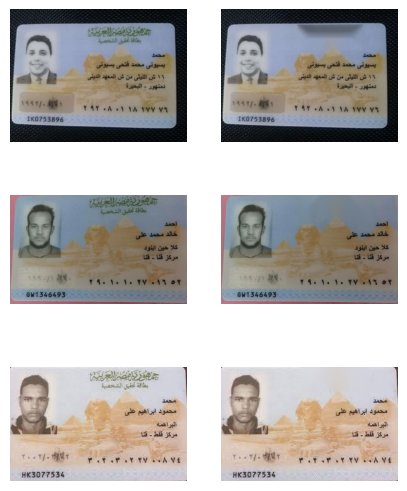

In [20]:
# show test sample results
counter = 1
plt.figure(figsize=(5, 20))

for item in os.listdir(input_root_path):
    # show original image (image with logo) 
    plt.subplot(9, 2, counter + (counter - 1))
    plt.axis('off')
    img = plt.imread(f'{input_root_path}/{item}')
    plt.imshow(img)
    
    # show resutl image (image without logo)
    plt.subplot(9, 2, 2*counter)
    plt.axis('off')
    img = plt.imread(f'{out_root_path}/{item}')
    plt.imshow(img)
    
    # increment counter
    counter += 1
    
    # use followinf condition to show only 3 images 
    if counter > 3:
        break
plt.show()